In [1]:
# cd("C:\\Users\\matsuno\\Desktop\\data_analysis\\HMMBase.jl\\src")
# include(".//HMMBase.jl")
# using .HMMBase

import Pkg
Pkg.activate("C://Users//matsuno//.julia//environments//v1.4.2//Project.toml")
Pkg.develop(Pkg.PackageSpec(url="C:\\Users\\matsuno\\Desktop\\data_analysis\\HMMBase.jl\\"))
using HMMBase

using Distributions
using Random
using PyPlot
using ArgCheck
import Base:OneTo

 Activating environment at `C:\Users\matsuno\.julia\environments\v1.4.2\Project.toml`
Path `C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\` exists and looks like the correct package. Using existing path.
  Resolving package versions...
   Updating `C:\Users\matsuno\.julia\environments\v1.4.2\Project.toml`
 [no changes]
   Updating `C:\Users\matsuno\.julia\environments\v1.4.2\Manifest.toml`
 [no changes]


# old test

In [2]:
import Pkg
Pkg.activate("C://Users//matsuno//.julia//environments//v1.4.2//Project.toml")
Pkg.add("HMMBase")

using Test
using HMMBase
using Distributions
using Random

Random.seed!(2019)

hmms = [
    HMM([0.9 0.1; 0.1 0.9], [Normal(10, 1), Gamma(1, 1)]),
    HMM([0.9 0.1; 0.1 0.9], [Categorical([0.1, 0.2, 0.7]), Categorical([0.5, 0.5])]),
    HMM([0.9 0.1; 0.1 0.9], [MvNormal([0.0, 0.0], [1.0, 1.0]), MvNormal([10.0, 10.0], [1.0, 1.0])]),
]

@testset "Integration $(typeof(hmm))" for hmm in hmms, T in [1, 1000]
    K = size(hmm, 1)

    # HMM API
    @test hmm !== copy(hmm)

    z, y = rand(hmm, T, seq = true)
    @test size(z, 1) == size(y, 1)
    @test size(y, 2) == size(hmm, 2)

    y = rand(hmm, z)
    @test size(z, 1) == size(y, 1)
    @test size(y, 2) == size(hmm, 2)

    LL = HMMBase.log_likelihoods(hmm, y)
    @test size(LL) == (T, K)

    # Forward/Backward
    α1, logtot1 = forward(hmm, y)
    β1, logtot2 = backward(hmm, y)
    γ1 = posteriors(hmm, y)
    logtot3 = loglikelihood(hmm, y)

    @test size(α1) == size(β1) == size(γ1)
    @test logtot1 ≈ logtot2 ≈ logtot3

    # Viterbi
#     zv1 = viterbi(hmm, y)
#     @test size(zv1) == size(z)

    # MLE
#     if T > 2
#         hmm2, _ = fit_mle(hmm, y, maxiter = 1, display = :iter)
#         @test size(hmm2) == size(hmm)
#         @test typeof(hmm2) == typeof(hmm)

#         hmm2, _ = fit_mle(hmm, y, init = nothing)
#         @test size(hmm2) == size(hmm)
#         @test typeof(hmm2) == typeof(hmm)

#         hmm2, _ = fit_mle(hmm, y, init = :kmeans, robust = true)
#         @test size(hmm2) == size(hmm)
#         @test typeof(hmm2) == typeof(hmm)
#     end
end

 Activating environment at `C:\Users\matsuno\.julia\environments\v1.4.2\Project.toml`
   Updating registry at `C:\Users\matsuno\.julia\registries\General`
┌ Warning: Some registries failed to update:
│     — `C:\Users\matsuno\.julia\registries\General` — registry dirty
└ @ Pkg.Types D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\Types.jl:1131
  Resolving package versions...
   Updating `C:\Users\matsuno\.julia\environments\v1.4.2\Project.toml`
  [b2b3ca75] ~ HMMBase v1.0.6 [`C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\`] ⇒ v1.0.6
   Updating `C:\Users\matsuno\.julia\environments\v1.4.2\Manifest.toml`
  [b2b3ca75] ~ HMMBase v1.0.6 [`C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\`] ⇒ v1.0.6
┌ Info: Precompiling HMMBase [b2b3ca75-8444-5ffa-85e6-af70e2b64fe7]
└ @ Base loading.jl:1260
┌ Warning: `log_likelihoods(hmm, observations)` is deprecated, use `likelihoods(hmm, observations, logl = true)` instead.
│   caller = macro expansion at In[2]:32 [inlined

Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                         | Pass  Total
Integration HMM{Multivariate,Float64} |    8      8
Test Summary:                         | Pass  Total
Integration HMM{Multivariate,Float64} |    8      8


6-element Array{Any,1}:
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Multivariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Multivariate,Float64}", Any[], 8, false)

# new test

In [2]:
using Test
using Distributions
using Random

Random.seed!(2019)

hmms = [
    HMM([0.8 0.2; 0.2 0.8], [Normal(10, 1), Gamma(1, 1)]),
    HMM([0.8 0.2; 0.2 0.8], [Categorical([0.1, 0.2, 0.7]), Categorical([0.5, 0.5])]),
    HMM([0.8 0.2; 0.2 0.8], [MvNormal([0.0, 0.0], [1.0, 1.0]), MvNormal([10.0, 10.0], [1.0, 1.0])]),
]

@testset "Integration $(typeof(hmm))" for hmm in hmms, T in [0, 1, 100], N in [0, 1, 100]
    K = size(hmm, 1)

    # HMM API
    @test hmm !== copy(hmm)

    z, y = rand(hmm, T, N, seq = true)
    @test size(z, 1) == size(y, 1)
    @test size(z, 2) == last(size(y))
    ((ndims(y) > 2) && (N >= 1)) && (@test size(y, 2) == size(hmm, 2))

    y = rand(hmm, z)
    @test size(z, 1) == size(y, 1)
    ((ndims(y) > 2) && (N >= 1)) && (@test size(y, 2) == size(hmm, 2))

    LL = loglikelihoods(hmm, y)
    @test size(LL) == (T, K, N)

    # Forward/Backward
    α1, logtot1 = forward(hmm, y)
    β1, logtot2 = backward(hmm, y)
    γ1 = posteriors(hmm, y)
    logtot3 = loglikelihood(hmm, y)

    @test size(α1) == size(β1) == size(γ1)
    @test logtot1 ≈ logtot2 ≈ logtot3
    
    # Viterbi
    zv1, _ = viterbi(hmm, y)
    @test size(zv1) == size(z)

    # MLE
    if (T > 2)&&(N > 2)
        hmm2, _ = fit_mle(hmm, y, maxiter = 1, display = :iter)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)

        hmm2, _ = fit_mle(hmm, y, init = nothing)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)

        hmm2, _ = fit_mle(hmm, y, init = :kmeans, robust = true)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)
    end
end

Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Test Summary:                       | Pass  Total
Integration HMM{Univariate,Float64} |    8      8
Iteration 0: logtot = -17008.19469548681
Iteration 1: logtot = -17048.274366675178
EM has not converged after 1 iterations, logtot = -17048.274366675178
Test Summary:                       | Pass  Tot

27-element Array{Any,1}:
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 14, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,Float64}", Any[], 8, false)
 Test.DefaultTestSet("Integration HMM{Univariate,F

In [4]:
using Test
using Distributions
using Random

Random.seed!(2019)

hmms = [
    HMM([0.8 0.2; 0.2 0.8], [Normal(10, 1), Gamma(1, 1)]),
    HMM([0.8 0.2; 0.2 0.8], [Categorical([0.1, 0.2, 0.7]), Categorical([0.5, 0.5])]),
    HMM([0.8 0.2; 0.2 0.8], [MvNormal([0.0, 0.0], [1.0, 1.0]), MvNormal([10.0, 10.0], [1.0, 1.0])]),
]

@testset "Integration $(typeof(hmm))" for hmm in hmms, N in [0, 1, 100], d in [Poisson(10), Geometric(0.8)]
    K = size(hmm, 1)

    # HMM API
    @test hmm !== copy(hmm)

    z, y = rand(hmm, d, N, seq = true)
    @test size(z, 1) == size(y, 1)
    @test size(z, 2) == last(size(y))
    ((ndims(y) > 2) && (N >= 1)) && (@test size(y, 2) == size(hmm, 2))

    y = rand(hmm, z)
    @test size(z, 1) == size(y, 1)
    ((ndims(y) > 2) && (N >= 1)) && (@test size(y, 2) == size(hmm, 2))

    LL = loglikelihoods(hmm, y)
    @test size(LL) == (T, K, N)

    # Forward/Backward
    α1, logtot1 = forward(hmm, y)
    β1, logtot2 = backward(hmm, y)
    γ1 = posteriors(hmm, y)
    logtot3 = loglikelihood(hmm, y)

    @test size(α1) == size(β19) == size(γ1)
    @test logtot1 ≈ logtot2 ≈ logtot3
    
    # Viterbi
    zv1, _ = viterbi(hmm, y)
    @test size(zv1) == size(z)

    # MLE
    if (T > 2)&&(N > 2)
        hmm2, _ = fit_mle(hmm, y, maxiter = 1, display = :iter)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)

        hmm2, _ = fit_mle(hmm, y, init = nothing)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)

        hmm2, _ = fit_mle(hmm, y, init = :kmeans, robust = true)
        @test size(hmm2) == size(hmm)
        @test typeof(hmm2) == typeof(hmm)
    end
end

Integration HMM{Univariate,Float64}: Error During Test at In[4]:13
  Got exception outside of a @test
  ArgumentError: N >= 1 must hold. Got
  N => 0
  Stacktrace:
   [1] macro expansion at C:\Users\matsuno\.julia\packages\ArgCheck\TDq9c\src\checks.jl:180 [inlined]
   [2] generate_random_lengths at C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\src\hmm.jl:414 [inlined]
   [3] rand(::Random._GLOBAL_RNG, ::HMM{Univariate,Float64}, ::Poisson{Float64}, ::Int64; seq::Bool) at C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\src\hmm.jl:264
   [4] #rand#11 at C:\Users\matsuno\Desktop\data_analysis\HMMBase.jl\src\hmm.jl:314 [inlined]
   [5] macro expansion at .\In[4]:19 [inlined]
   [6] macro expansion at D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Test\src\Test.jl:1186 [inlined]
   [7] top-level scope at .\In[4]:12
   [8] eval at .\boot.jl:331 [inlined]
   [9] softscope_include_string(::Module, ::String, ::String) at C:\Users\matsuno\.julia\packages\SoftGlobalScope\

TestSetException: Some tests did not pass: 1 passed, 0 failed, 1 errored, 0 broken.

# Univariate

In [2]:
a = [0.2, 0.8]
A = [0.9 0.1; 0.1 0.9]
B = [Normal(10, 1), Gamma(1, 1)]
hmm = HMM(a, A, B)

HMM{Univariate,Float64}([0.2, 0.8], [0.9 0.1; 0.1 0.9], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=10.0, σ=1.0), Gamma{Float64}(α=1.0, θ=1.0)])

## fixed number of observations with fixed length

In [9]:
Random.seed!(2019)
z, y = rand(hmm, 100, 2, seq = true)
size(z)

(100, 2)

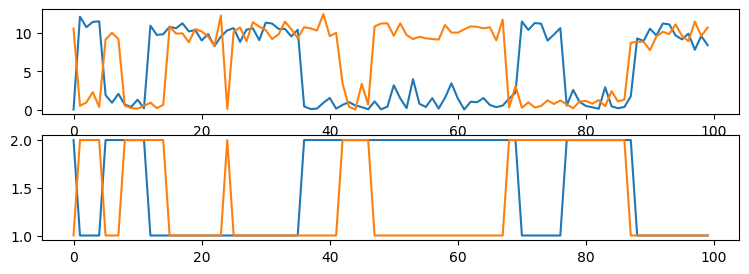

In [10]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-");

In [11]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((100, 2, 2), (100, 2, 2), (100, 2, 2))

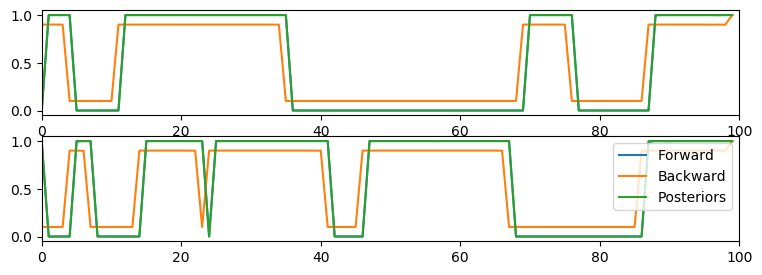

PyObject <matplotlib.legend.Legend object at 0x00000000017AA5C0>

In [12]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

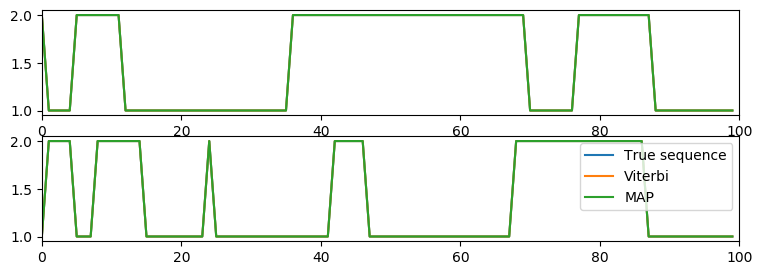

PyObject <matplotlib.legend.Legend object at 0x0000000001870518>

In [13]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [14]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 6 iterations, logtot = -297.2236985291553


(HMM{Univariate,Float64}([0.3946258345590855, 0.6053741654409145], [0.9210716515988014 0.07892834840119847; 0.135551152878816 0.864448847121184], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=10.144068890207615, σ=0.9558106987565306), Gamma{Float64}(α=1.037420024276778, θ=0.9227706164984028)]), HMMBase.EMHistory(true, 6, [-361.498210273512, -300.4208193244703, -297.26002502181103, -297.2256997086753, -297.2237032633156, -297.2236985291553]))

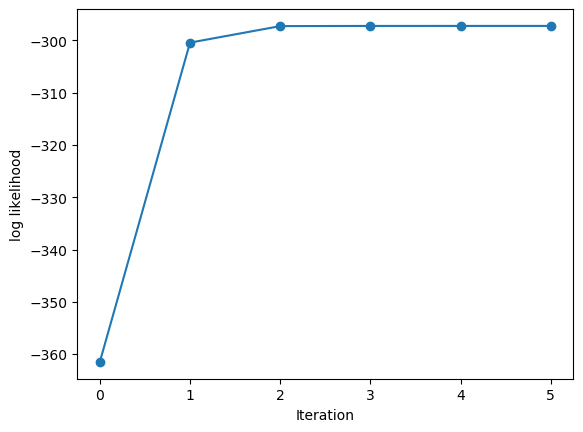

PyObject Text(24.0, 0.5, 'log likelihood')

In [16]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

## fixed number of observations with random length

In [17]:
a = [0.2, 0.8]
A = [0.9 0.1; 0.1 0.9]
B = [Normal(5, 1), Gamma(1, 1)]
hmm = HMM(a, A, B)

HMM{Univariate,Float64}([0.2, 0.8], [0.9 0.1; 0.1 0.9], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=5.0, σ=1.0), Gamma{Float64}(α=1.0, θ=1.0)])

In [18]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(500), 2, seq = true)

(Union{Nothing, Int64}[2 2; 2 2; … ; 2 nothing; 2 nothing], Union{Nothing, Float64}[1.3065196315496677 0.17059123896656245; 0.6932920960027175 0.15532660009365884; … ; 2.7659815690757457 nothing; 1.6904428630768742 nothing])

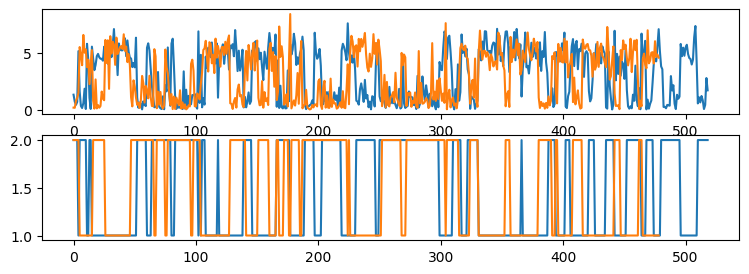

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001B52470>
 PyObject <matplotlib.lines.Line2D object at 0x0000000001B529B0>

In [19]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(y)
axes[2].plot(z, linestyle = "-")

In [20]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((519, 2, 2), (519, 2, 2), (519, 2, 2))

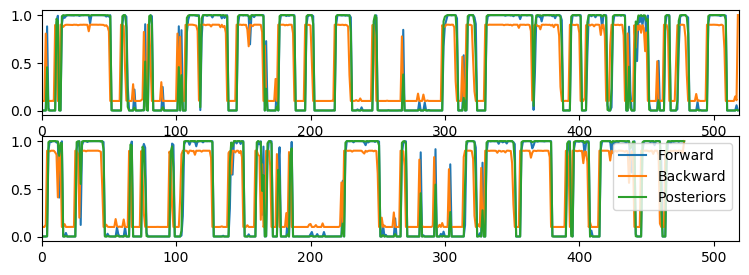

PyObject <matplotlib.legend.Legend object at 0x0000000062087E48>

In [21]:
_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

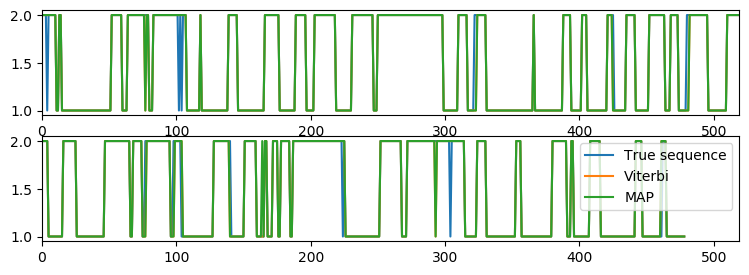

PyObject <matplotlib.legend.Legend object at 0x00000000619E4128>

In [22]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 3))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [23]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 12 iterations, logtot = -1475.9148747938784


(HMM{Univariate,Float64}([1.5918372323790184e-43, 1.0], [0.9043595220775722 0.09564047792242784; 0.09907962522926042 0.9009203747707396], Distribution{Univariate,S} where S<:ValueSupport[Normal{Float64}(μ=4.9563124105817975, σ=1.0024952374914016), Gamma{Float64}(α=1.0553712753333493, θ=0.8998413653176818)]), HMMBase.EMHistory(true, 12, [-1641.4390680916108, -1488.8141156428937, -1477.6017570390366, -1476.4327901377064, -1476.100519973598, -1475.986852486894, -1475.9448500892863, -1475.928094027247, -1475.9208348308887, -1475.9174391147628, -1475.9157507916093, -1475.9148747938784]))

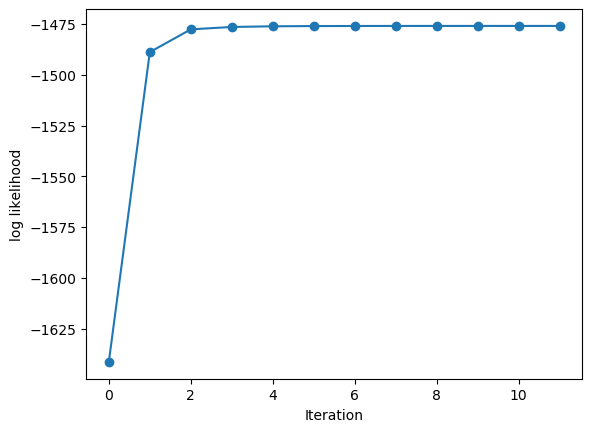

PyObject Text(24.0, 0.5, 'log likelihood')

In [24]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

# Multivariate

In [226]:
a = [0.6, 0.4]
A = [0.9 0.1; 0.1 0.9]
B = [MvNormal([0.0, 5.0], ones(2) * 1), MvNormal([0.0, 5.0], ones(2) * 3)]
hmm = HMM(a, A, B)
size(hmm) # (number of states, observations dimension)

(2, 2)

## fixed number of observations with fixed length

In [227]:
Random.seed!(1234)
z, y = rand(hmm, 500, 2, seq = true)
size(z)

(500, 2)

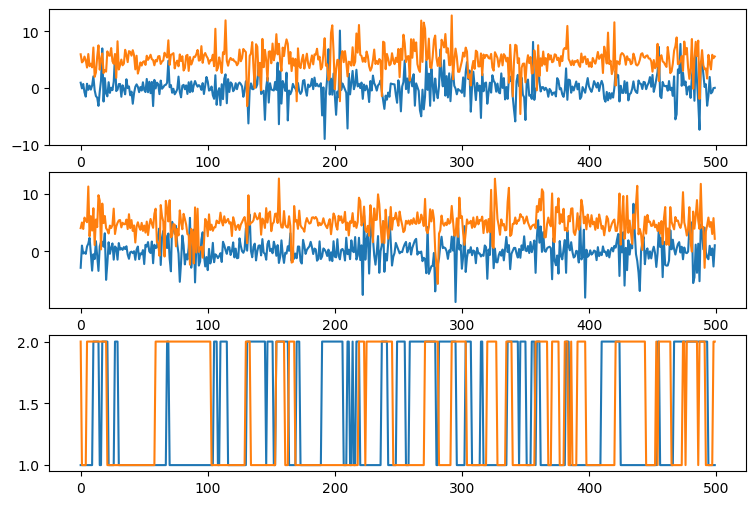

2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006649C6D8>
 PyObject <matplotlib.lines.Line2D object at 0x000000006649CC18>

In [228]:
_, axes = subplots(nrows = 3, figsize = (9, 6))
axes[1].plot(y[:, :, 1])
axes[2].plot(y[:, :, 2])
axes[3].plot(z, linestyle = "-")

In [229]:
α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((500, 2, 2), (500, 2, 2), (500, 2, 2))

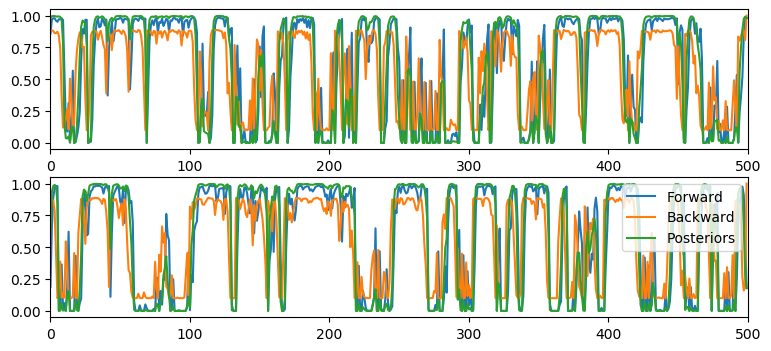

PyObject <matplotlib.legend.Legend object at 0x00000000637ADE80>

In [230]:
_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

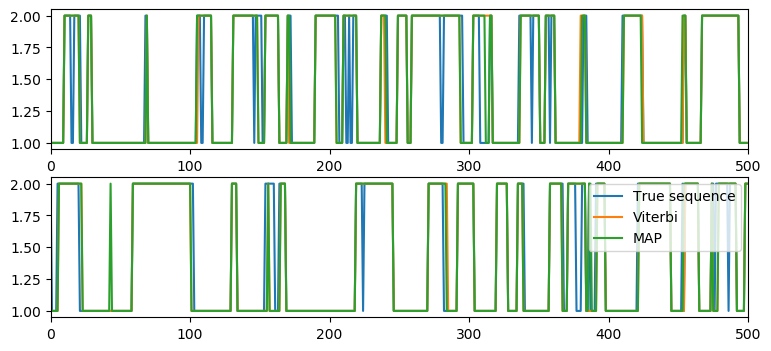

PyObject <matplotlib.legend.Legend object at 0x0000000063840358>

In [231]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [232]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 18 iterations, logtot = -3995.978831445997


(HMM{Multivariate,Float64}([0.9999999335475822, 6.645241774816211e-8], [0.9221335911805533 0.07786640881944663; 0.10062559356400728 0.8993744064359928], Distribution{Multivariate,S} where S<:ValueSupport[DiagNormal(
dim: 2
μ: [0.03821669296979302, 4.955515570472608]
Σ: [1.0830928804856768 0.0; 0.0 0.9936338566053791]
)
, DiagNormal(
dim: 2
μ: [0.1606459611637988, 4.974211829026947]
Σ: [9.308653574739658 0.0; 0.0 9.765658080257534]
)
]), HMMBase.EMHistory(true, 18, [-4231.112604656661, -4127.396803224941, -4055.212389471139, -4018.5291470216753, -4002.751101090199, -3996.911975595701, -3995.4626985050436, -3995.4168744574663, -3995.6187274011495, -3995.7810227559294, -3995.8769419850246, -3995.9279911189055, -3995.953980057546, -3995.966947765238, -3995.973359283343, -3995.9765165166723, -3995.9780687192956, -3995.978831445997]))

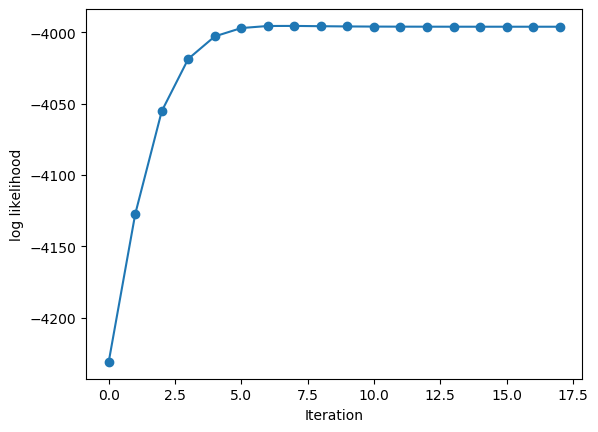

PyObject Text(24.0, 0.5, 'log likelihood')

In [233]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")

## fixed number of observations with random length

In [234]:
Random.seed!(1234)
z, y = rand(hmm, Poisson(500), 2, seq = true)

(Union{Nothing, Int64}[1 1; 1 1; … ; 1 nothing; 1 nothing], Union{Nothing, Float64}[0.9378142524426816 7.160341264259222; -0.24458308457224953 5.456248547197689; … ; -0.6794573666575288 5.2609144763809175; -1.098710415919168 5.0768766116262976]

Union{Nothing, Float64}[2.3997526166358747 4.557309526091927; 1.260474950605631 5.055265268572561; … ; nothing nothing; nothing nothing])

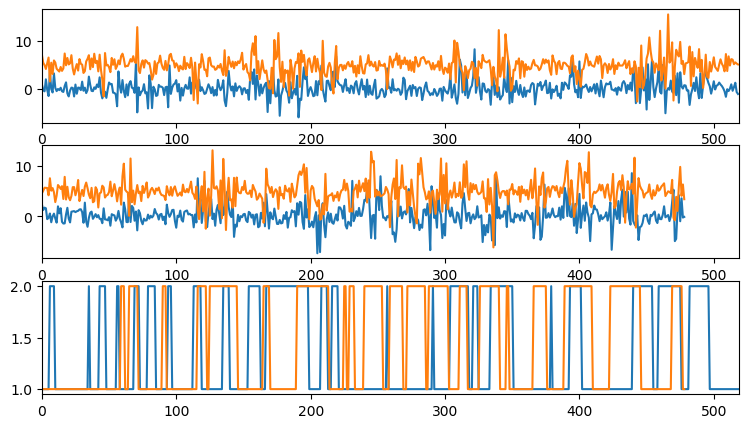

(0, 519)

In [235]:
_, axes = subplots(nrows = 3, figsize = (9, 5))
axes[1].plot(y[:, :, 1])
axes[1].set_xlim(0, size(y[:, :, 1], 1))
axes[2].plot(y[:, :, 2])
axes[2].set_xlim(0, size(y[:, :, 2], 1))
axes[3].plot(z, linestyle = "-")
axes[3].set_xlim(0, size(y[:, :, 1], 1))

In [236]:
# not implemented yet...

α, logtot = forward(hmm, y)
β, logtot = backward(hmm, y)

γ = posteriors(hmm, y) # or
γ = posteriors(α, β)

size(α), size(β), size(γ)

((519, 2, 2), (519, 2, 2), (519, 2, 2))

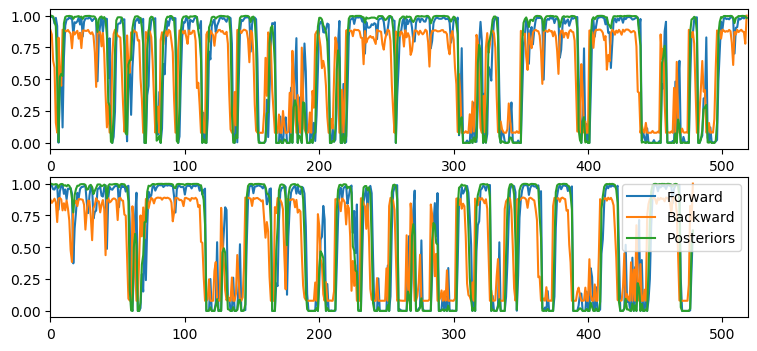

PyObject <matplotlib.legend.Legend object at 0x0000000063D610F0>

In [237]:
_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot([α[:, 1, 1] β[:, 1, 1] γ[:, 1, 1]])
axes[1].set_xlim(0, size(y, 1))
axes[2].plot([α[:, 1, 2] β[:, 1, 2] γ[:, 1, 2]])
axes[2].set_xlim(0, size(y, 1))
legend(["Forward", "Backward", "Posteriors"], loc = "upper right")

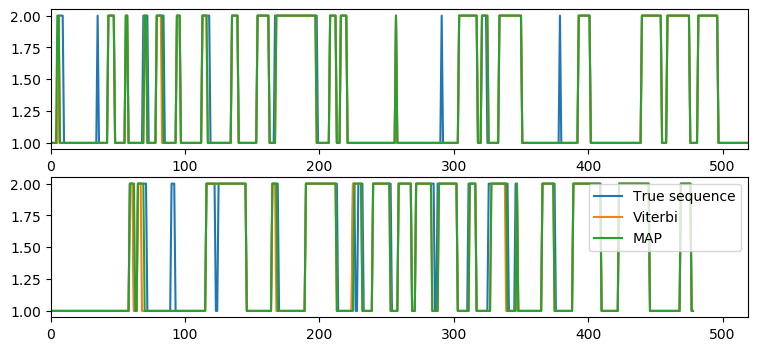

PyObject <matplotlib.legend.Legend object at 0x0000000063DEEE48>

In [238]:
z_map = Matrix{Any}(nothing, size(z))
for n in 1:size(γ, 3)
    for t in 1:size(filter(!isnothing, γ[:, 1, n]), 1)
        z_map[t, n] = argmax(γ[t, :, n])
    end
end
z_viterbi, LL = viterbi(hmm, y)

_, axes = subplots(nrows = 2, figsize = (9, 4))
axes[1].plot(z[:, 1], linestyle = "-")
axes[1].plot(z_viterbi[:, 1], linestyle = "-")
axes[1].plot(z_map[:, 1], linestyle = "-")
axes[1].set_xlim(0, size(y, 1))
axes[2].plot(z[:, 2], linestyle = "-")
axes[2].plot(z_viterbi[:, 2], linestyle = "-")
axes[2].plot(z_map[:, 2], linestyle = "-")
axes[2].set_xlim(0, size(y, 1))
legend(["True sequence", "Viterbi", "MAP"], loc = "upper right")

In [239]:
hmm, history = fit_mle(hmm, y, display = :final, init = :kmeans)

EM converged in 20 iterations, logtot = -3960.0894269919213


(HMM{Multivariate,Float64}([1.361927376025541e-6, 0.9999986380726239], [0.900026912957598 0.099973087042402; 0.07484978326536354 0.9251502167346364], Distribution{Multivariate,S} where S<:ValueSupport[DiagNormal(
dim: 2
μ: [0.451832281293949, 4.67545183655721]
Σ: [8.719778658473874 0.0; 0.0 11.937749115136583]
)
, DiagNormal(
dim: 2
μ: [0.0074498572611532135, 4.977076502183725]
Σ: [1.0735589439885398 0.0; 0.0 1.1189342650272438]
)
]), HMMBase.EMHistory(true, 20, [-4201.511521180094, -4081.419361478349, -4004.8203831264245, -3974.7978748874402, -3965.5535691936293, -3963.3244943447544, -3963.015985309, -3963.0900528361426, -3963.170569600672, -3963.1429664683865, -3962.7578041095976, -3961.635792738136, -3960.5099017888224, -3960.130391457648, -3960.0745398123495, -3960.0765240501505, -3960.082620153139, -3960.0864407078634, -3960.0884366279797, -3960.0894269919213]))

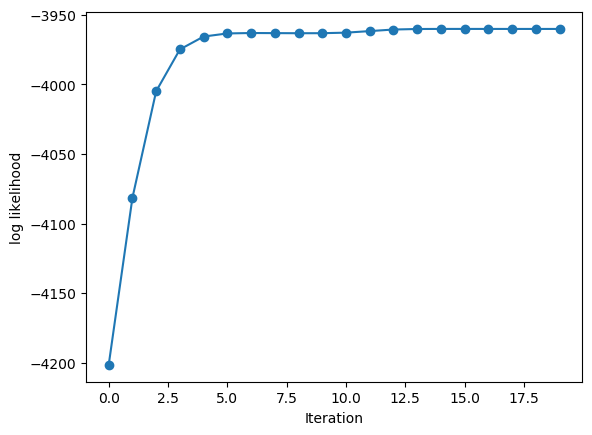

PyObject Text(24.0, 0.5, 'log likelihood')

In [240]:
plot(history.logtots, marker="o")
xlabel("Iteration")
ylabel("log likelihood")